# Day7

In [2]:
# handson pd
# eda
# overview ML

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('/Users/Ganesh/Desktop/SFJ/Data/city_temp.csv')

FileNotFoundError: [Errno 2] File b'/Users/Ganesh/Desktop/SFJ/Data/city_temp.csv' does not exist: b'/Users/Ganesh/Desktop/SFJ/Data/city_temp.csv'

In [ ]:
df

In [ ]:
df[df.city == 'Mumbai']

In [ ]:
df.city = df.city.str.strip()

In [ ]:
df[df.city == 'Mumbai']

In [ ]:
df

In [ ]:
df[df.city.str.strip() == 'Mumbai'].temp.mean()

In [ ]:
df[df.city.str.strip() == 'Pune'].temp.mean()

In [ ]:
df

In [ ]:
gr = df.groupby('city')

In [ ]:
for i, city in gr:
    print(city)

In [ ]:
df.describe()

In [ ]:
gr.describe()

In [ ]:
df = pd.read_excel('/Users/Ganesh/Desktop/SFJ/Data/students.xlsx')

In [ ]:
df.head()

In [ ]:
d = df.groupby('class')

In [ ]:
type(d)

In [ ]:
d.

In [ ]:
for _, c in df.groupby('class'):
    print('DataFrame:\n', c)
    print(c[c.maths == max(c.maths)])

In [ ]:
df = pd.read_csv('/Users/Ganesh/Desktop/SFJ/Data/titanic.csv')

In [ ]:
df.head()

In [ ]:
# % survived who embarked on 'C'

In [ ]:
df.groupby('Embarked').aggregate(np.mean)

In [ ]:
import sklearn

In [ ]:
from sklearn.datasets import load_boston

In [ ]:
boston = load_boston()

In [ ]:
type(boston)

In [ ]:
b = pd.DataFrame(boston.data)

In [ ]:
type(b)

In [ ]:
b.head()

In [ ]:
boston.feature_names

In [ ]:
b.columns = boston.feature_names

In [ ]:
b.head()

In [ ]:
b['PRICE'] = boston.target

In [ ]:
b.head()

In [ ]:
# X --> independent variables
# y --> dependent variable
X = b.drop('PRICE', axis=1)

In [ ]:
X.head()

In [ ]:
y = b.PRICE

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

In [ ]:
print('Slope of straight line: ', model.coef_)
print('intercept: ', model.intercept_)

In [ ]:
# y = mx + c
# price = m (CRIM) + c
# price = -1.07 (0.00632) + 36.49

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(boston.data, boston.target, test_size=0.20, random_state=5)

In [ ]:
print(train_X.shape)
print(train_y.shape)

In [ ]:
print(test_X.shape)
print(test_y.shape)

In [ ]:
model2 = LinearRegression()
model2.fit(train_X, train_y)
pred_y = model2.predict(test_X)

In [ ]:
print('MSE of model is: ', np.mean((test_y - pred_y) ** 2))

In [ ]:
plt.scatter(b.RM, b.PRICE)

In [6]:
emp = pd.read_csv('/Users/Ganesh/Desktop/SFJ/Data/Salary_Data.csv')

FileNotFoundError: [Errno 2] File b'/Users/Ganesh/Desktop/SFJ/Data/Salary_Data.csv' does not exist: b'/Users/Ganesh/Desktop/SFJ/Data/Salary_Data.csv'

In [202]:
emp.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [203]:
# Salary = b0 + b1*Experience
# Salary --> X --> dependent variables
# YearsExperience --> y --> independent variable

In [206]:
X = emp.iloc[:, :-1].values
y = emp.iloc[:, 1].values

In [209]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=2)
print(train_X.shape)
print(test_X.shape)

(24, 1)
(6, 1)


In [210]:
emp_model = LinearRegression()
emp_model.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [211]:
y_pred = emp_model.predict(test_X)

In [212]:
y_pred

array([36833.63210301, 34919.71472592, 67456.3101364 , 59800.64062805,
       92337.23603852, 81810.69046455])

In [213]:
test_y

array([46205., 39343., 61111., 57189., 98273., 93940.])

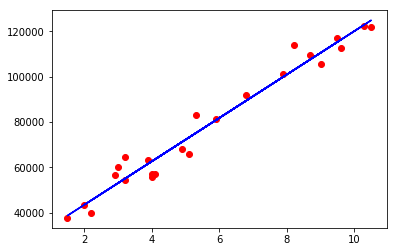

In [214]:
plt.scatter(train_X, train_y, color='red')
plt.plot(train_X, emp_model.predict(train_X), color='blue')

In [215]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_y, y_pred)

56137509.997825585